# Analysis of Multiple Translations of *The Popol Vuh*: Is Violence a Prominent Theme?

By: Emily Lopez

Dr. Brooks Jessup<br> Digital Humanities 101 <br>Summer 2021

**What's the issue?**

Across popular culture films, the ancient Maya are typically portrayed as a barbaric and
violent civilization. Although they are recognized for their revolutionary astronomical and scientific
achievements, such as the Maya Calendar and the concept of zero, films often cast their
accomplishments in an ominous tone associated with doom. This parallels contemporary research in
Maya history, where academics are finding that the ancient Maya were more violent than previously
considered and that war and rivalry between the Maya city-states likely led to their great
civilization’s downfall. However, there is still unresolved discussion on the ancient Maya’s
motivation behind war. Additionally, since the idea of a conflict-oriented Maya civilization is
relatively recent, I believe there is still room for discussion to better understand their values and
reasoning behind warfare. An analysis of *The Popol Vuh*, a Maya text which uses a blend of
mythological, cultural and historical narratives to explain the creation of the world, could give insight
into the ancient civilization’s culture and value system; due to its continual importance in the Maya
community, I believe this text is a reliable source for understanding these concerns.

*To read more about how some Maya communties view modern portrayl of ancient Maya culture, refer to this article: https://www.wsj.com/articles/BL-SEB-13660* 

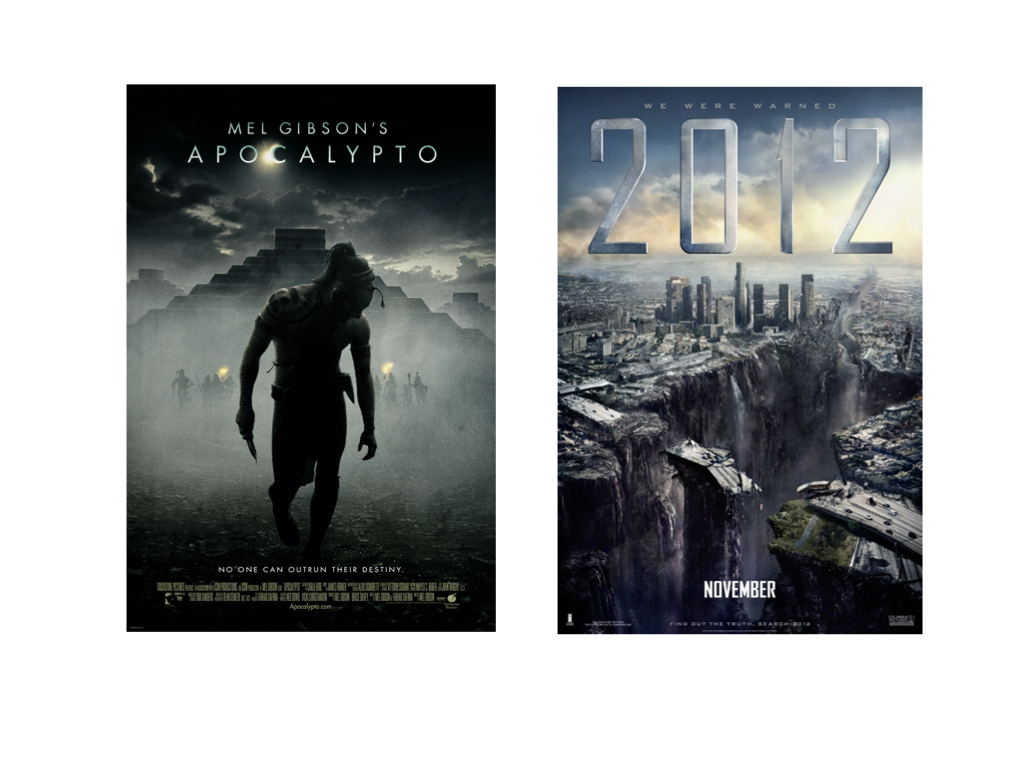

In [5]:
from IPython.core.display import Image, display
movies_path = "/Users/emilylopez/Desktop/DIGHUM101/DIGHUM101_Indiv_Proj/pdftotext/movies.001.jpeg"
display(Image(movies_path, width=800, unconfined=True))

**My research will dive into these following questions:**

What could the Maya’s most influential text, *The Popol Vuh*, tell us about their actions, and
does it align with what is shown in the media and understood in current academic research? Are there
discrepancies in violent themes and language across the various translations of The Popol Vuh, and
may this be a contributing factor to the graphic and violent depiction of Maya civilizations?

**Why is this research important?**

Understanding if violence is inherent in ancient Maya culture and exploring their reasoning
behind violent actions is important for creating an accurate representation of this influential
civilization in modern media and research. In regards to the former, continual misrepresentation of
this civilization in Western media casts a negative and inappropriate light on members of current
Maya communities. Additionally, if we misinterpret their reasonings, values, and culture, we may
still have limited knowledge of how they developed their breakthroughs in science, mathematics, and
astronomy. Lastly, by developing a better understanding of the emphasis on violence and warfare in
their culture, we may recognize our own civilization’s values and how we exemplify them in our
society.

First, we must import the necessary libraries and modules in order to perform our analysis on our text data.

In [6]:
import os 
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import spacy
# Module to remove punctuation from string library
from string import punctuation

# Module to count word frequencies
from collections import Counter

# Module to help us remove stopwords
import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

# this is to hide warnings that are given in some of the cells
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis.sklearn # visualize our topic models!
# CV (multiple train/test splitting)
from sklearn.model_selection import cross_val_score, train_test_split
# Algorithms (unsupervised)
from sklearn.decomposition import LatentDirichletAllocation, PCA
# (supervised)
from sklearn.linear_model import LogisticRegression
# Tools to create our DTMs
from sklearn.feature_extraction.text import TfidfTransformer
# Speed up your machine learning setup
from sklearn.pipeline import Pipeline
# Mix up our training and test sets
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilylopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilylopez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing Text Files & Exploratory Data Analysis

In order to load the text files we want to analyzie, we must change our working directory to the directory where the files are located. My project text files are located in the directory "pdftotext."

In [7]:
#Checks to see what our current working directory is 
%pwd

'/Users/emilylopez/Desktop/DIGHUM101/DIGHUM101_Indiv_Proj'

In [13]:
#Changes our working direcotry to "pdftotext," where my files are located.
os.chdir("pdftotext")

In [14]:
#Check our working directory again to make sure we are in the right directory. Looks like we are!
%pwd

'/Users/emilylopez/Desktop/DIGHUM101/DIGHUM101_Indiv_Proj/pdftotext'

### Opening the text files


Next, we must load the text files we wish to analyze. I am loading three translations of the ancient Maya text, *The Popol Vuh,* each published in different time periods and translated by different authors. 

I sourced these three translations from the website Holy Books, noted as the largest online collection of high-quality sacred texts and then exported the PDF ebook versions into text files for
my computational analysis.

Because the texts I chose come from a range of backgrounds, I believe my results will give me a better representation of the variation across translations of this book.

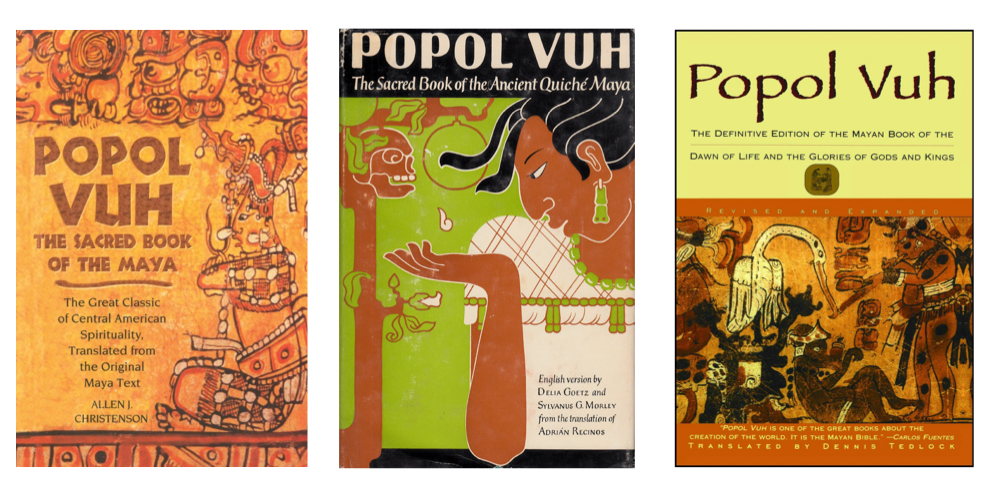

In [15]:
from IPython.core.display import Image, display
movies_path = "/Users/emilylopez/Desktop/DIGHUM101/DIGHUM101_Indiv_Proj/pdftotext/popol_vuh.jpeg"
display(Image(movies_path, width=800, unconfined=True))


The text *Popol Vuh: Sacred Book of the Quiché Maya People* was published in 2007 and was translated by and includes commentary from Allen J. Christenson, a leading scholar of Maya literature.

In [16]:
# opens the translated text by Allen J Christenson
allen_translation = open("Popol_Vuh_translated_by_Allen_J_Christenson_editted.txt", encoding = "utf-8").read()
print(allen_translation[:300])

POPOL VUH
PREAMBLE1
THIS IS THE BEGINNING2 OF THE ANCIENT TRADITIONS3 of this place
called Quiché.4
HERE we shall write.5 We shall begin6 to tell the ancient stories of the beginning,
the origin of all that was done in the citadel7 of Quiché, among the people of the Quiché
nation.8

1

lines 1-96

2



*The Book of the People: Popul Vuh* was written by Delia Goetz and Sylvanus Griswold Morley and was published in 1954.  It continues to be a major reference for scholars since it stems from a Spanish translation of the
original *The Popol Vuh*, which is written in the Quiché language. 

In [17]:
# opens the translated text by Delia Goetz & Sylvanus G Morley
delia_sylvanus_translation = open("Popol_Vuh_translated_by_DeliaGoetz_SylvanusGMorley_editted.txt", encoding = "utf-8").read()
print(delia_sylvanus_translation[:300])

Preamble
THIS IS THE BEGINNING of the old traditions of this place called Quiché.
Here we shall write and we shall begin the old stories, the beginning and the origin of all that
was done in the town of the Quiché, by the tribes of the Quiché nation.
And here we shall set forth the revelation, the d



This final translation is by Dennis Tedlock and is called *Popol Vuh: The Maya Book of the Dawn of Life*. It was published in 1985 and is notable because it introduces ancient knowledge through commentary
and interpretation by a modern Quiche daykeeper (a Maya shaman priest), Andrés Xiloj. 

In [18]:
# opens the translated text by Dennis Tedlock
dennis_translation = open("Popol_Vuh_translated_by_Dennis_Tedlock_editted.txt",encoding = "utf-8").read()
print(dennis_translation[:300])

PART ONE
THIS IS THE BEGINNING*(48) OF THE ANCIENT WORD, here in this place
called Quiche.*(49) Here we shall inscribe, we shall implant the
Ancient Word, the potential and source for everything done in the
citadel of Quiche, in the nation of Quiche people.
And here*(50) we shall take up the demonst


We will now place all these texts into a pandas DataFrame. We will be working from the texts under the column "text" from now on.

In [19]:
texts = ([["Popol Vuh: Sacred Book of the Quiché Maya People", "Allen J. Christenson",2007,allen_translation], 
          ["The Book of the People: Popul Vuh", "Delia Goetz and Sylvanus Griswold Morley",1954,delia_sylvanus_translation], 
          ["Popol Vuh: The Maya Book of the Dawn of Life", "Dennis Tedlock",1985, dennis_translation]])
         
texts_df = pd.DataFrame(texts, columns=["title", "author(s)", "publication_date","text"])
texts_df

,title,author(s),publication_date,text
0,Popol Vuh: Sacred Book of the Quiché Maya People,Allen J. Christenson,2007,POPOL VUH\nPREAMBLE1\nTHIS IS THE BEGINNING2 O...
1,The Book of the People: Popul Vuh,Delia Goetz and Sylvanus Griswold Morley,1954,Preamble\nTHIS IS THE BEGINNING of the old tra...
2,Popol Vuh: The Maya Book of the Dawn of Life,Dennis Tedlock,1985,PART ONE\nTHIS IS THE BEGINNING*(48) OF THE AN...


### Text Preprocessing: Cleaning & reformatting the text files

As seen by the text previews above, each text file has different formatting and includes information aside from the literature alone, such as page numbers, website links, etc. Since we only want to analyze text from *The Popol Vuh,* we must remove this excess information and format each of the texts in the same fashion. Only after the text has been filtered and standardized may we start our analysis.

In [20]:
# For loop which converts each of the texts to lower case and replaces puncation marks with an empty space
for index in range(3): #3 texts 
    for char in punctuation:
        texts_df['text'][index] = texts_df['text'][index].lower().replace(char, "")     
    
#this function removes the digits from the text 
def remove_digits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

texts_df['text'] = texts_df['text'].apply(remove_digits)


# these steps remove these certain expressions which appear frequently in the text and might skew the results

#Allen J. Christenson's translation:
#remove 'see p lines', 'see pp      lines', 'pp      lines', 'pp'
texts_df['text'][0] = re.sub("see\sp+\s+lines|p+\s+lines", " ",texts_df['text'][0])
texts_df['text'][0] = texts_df['text'][0].replace("pp", " ")


#Delia Goetz and Sylvanus Griswold Morley translation:
#remove 'i/ii/iii/iv chapter'
texts_df['text'][1] = re.sub("i{1,3} chapter|iv chapter", " ",texts_df['text'][1])

#Dennis Tedlock's translation:
#remove page   popol vuh the mayan book of the dawn of life  dennis tedlock with commentary based on the ancient
#remove wwwtalebookscom
texts_df['text'][2] = texts_df['text'][2].replace("page   popol vuh the mayan book of the dawn of life  dennis tedlock with commentary based on the ancient", " ")
texts_df['text'][2] = texts_df['text'][2].replace("wwwtalebookscom", " ")

In [21]:
# example of the new clean text 
print(texts_df['text'][0][:200])

popol vuh
preamble
this is the beginning of the ancient traditions of this place
called quiché
here we shall write we shall begin to tell the ancient stories of the beginning
the origin of all that wa


### Tokenizing & Stop Word Removal

In order to perform our analysis, we must first "tokenize" the texts, meaning we will split the texts into an array of individual words.

Another important step is removing stop words, such as "the", "i","me", "you", etc.. The list of English stop words we will be removing can be found here: https://gist.github.com/sebleier/554280. Since we will be counting word frequency as part of our analysis, we want to make sure words that don't add meaning to our sentences are removed.

In [22]:
#Tokenize each text into single words, remove stop words, then add them to our dataframe
#creates a new column 'tokens' with placeholder values
texts_df['tokens'] = [0,1,2]

for index in range(3):
    tokens = texts_df['text'][index].split()
    tokens_nostop = []
    for word in tokens:
        if word not in stopwords.words('english'):
            tokens_nostop.append(word)
    texts_df['tokens'][index] = tokens_nostop
    

In [23]:
#preview of the data frame now with the additional "tokens" column
texts_df

,title,author(s),publication_date,text,tokens
0,Popol Vuh: Sacred Book of the Quiché Maya People,Allen J. Christenson,2007,popol vuh\npreamble\nthis is the beginning of ...,"[popol, vuh, preamble, beginning, ancient, tra..."
1,The Book of the People: Popul Vuh,Delia Goetz and Sylvanus Griswold Morley,1954,preamble\nthis is the beginning of the old tra...,"[preamble, beginning, old, traditions, place, ..."
2,Popol Vuh: The Maya Book of the Dawn of Life,Dennis Tedlock,1985,part one\nthis is the beginning of the ancient...,"[part, one, beginning, ancient, word, place, c..."


### Counting Word Frequencies

Now we'll have a preview of the most common words in these three different translations. To get a consistent representation of the top words in the text, I tried looking at the top 0.1% of words in each translation, but given that some translations are significantly shorter than the others, I decided to look at the top 15 words for each translation.

#### Allen J. Christenson's Translation

In [24]:
freq_allen = Counter(texts_df['tokens'][0])
total_words = len(freq_allen) # 9173
allen_top_words = freq_allen.most_common(15)
print(allen_top_words)

[('thus', 475), ('one', 429), ('said', 307), ('great', 278), ('would', 257), ('quiché', 241), ('may', 238), ('name', 238), ('lords', 232), ('also', 231), ('hunahpu', 221), ('maya', 206), ('balam', 199), ('people', 187), ('house', 185)]


**Description & Context for the Quiché Maya words**:

**Quiché**: *The Popol Vuh* is the story of creation according to the Quiche Maya peoples of Guatemala. (https://www.worldhistory.org/Popol_Vuh/#:~:text=The%20Popol%20Vuh%20is%20the,although%20this%20comparison%20is%20imprecise)

**Hunahpu**: "Hunahpu and Xbalanque are the second Hero Twins in Maya mythology. Like all Mesoamerican cultures, the Maya believed in cyclical time, including periodic cosmic destruction and renovation, called the "ages of the world." The first pair of divine hero twins were the Maize Twins, 1 Hunter "Hun Hunahpu" and 7 Hunter "Vuqub Hunahpu," and they lived during the second world." (https://www.thoughtco.com/hunahpu-xbalanque-maya-hero-twins-171590)

**Balam**: "Having failed to make man from clay and wood, they tried making man from corn. This time it worked and four men were created: Balam-Quitzé (**Jaguar** Quitze), Balam-Acab (Jaguar Night), Mahucutah (Naught) and Iqui-Balam (wind Jaguar)" (https://www.thoughtco.com/the-popol-vuh-the-maya-bible-2136319)

#### Delia Goetz's and Sylvanus Griswold Morley's Translation

In [25]:
freq_DS = Counter(texts_df['tokens'][1])
total_words = len(freq_DS) # 2916
DS_top_words = freq_DS.most_common(15)
print(DS_top_words)

[('said', 370), ('shall', 261), ('lords', 177), ('us', 169), ('called', 162), ('one', 147), ('came', 138), ('great', 116), ('xibalba', 114), ('went', 113), ('boys', 110), ('well', 108), ('house', 104), ('people', 97), ('come', 94)]


**Description & Context for the Quiché Maya words**:

**Xibalba**: "*The Popol Vuh* is the Mayan story of the creation and of the Hero Twins and their victory over the lords of Xibalba (the underworld)." (https://www.historians.org/teaching-and-learning/teaching-resources-for-historians/teaching-and-learning-in-the-digital-age/creation-stories-and-epics/popol-vuh#:~:text=The%20Popol%20Vuh%20is%20the,account%20of%20this%20dramatic%20conflict.)

#### Dennis Tedlock's Translation

In [26]:
freq_Dennis = Counter(texts_df['tokens'][2])
total_words = len(freq_Dennis) # 8366
Dennis_top_words = freq_Dennis.most_common(15)
print(Dennis_top_words)

[('one', 735), ('lords', 342), ('quiche', 340), ('said', 336), ('hunahpu', 328), ('see', 300), ('house', 289), ('great', 278), ('name', 278), ('jaguar', 253), ('came', 228), ('lord', 227), ('place', 216), ('first', 209), ('b', 208)]


**Description & Context for the Quiché Maya words**:

**Jaguar**: Based on the previous description from Allen's text for "Balam," it is likely that Jaguar is the English translation for the name of some of the gods in the story, such as Jaguar Quitze, Jaguar Night and wind Jaguar. 

### Interpreting the word frequencies:

Based on this simple analysis, I can already see some words that distinguish the texts from the others. For example, the translation by Delia Goetz and Sylvanus Griswold Morley is the only text that has "Xibalba," the Quiché Maya word for the "underworld," in its top 15 words. However, it is also the shortest text: it is has about 3000 words while the other two translations range from 8000-9000 words. This is because the other two texts include commentary. Therefore, we can't tell for certain from this analysis alone that the Goetz and Morley translation places a greater emphasis on darker themes. The word "boys" also stands out to me in Goetz's and Morley's translation, but further analysis should give us a better idea of what this means for the text's overall theme. We can tell, however, that there are common words across each translation like "house" and "lords."   

### Let's visualize the data! 

In [27]:
#create dataframes for each translation's most common words
a = pd.DataFrame(allen_top_words, columns = ['word','frequency'] )
b = pd.DataFrame(DS_top_words, columns = ['word','frequency'] )
c = pd.DataFrame(Dennis_top_words, columns = ['word','frequency'] )

names = ["Allen J. Christenson", "Delia Goetz and Sylvanus Griswold Morley", "Dennis Tedlock"]

a["translation"] = names[0]
b["translation"] = names[1]
c["translation"] = names[2]

#example data frame
a.head()

,word,frequency,translation
0,thus,475,Allen J. Christenson
1,one,429,Allen J. Christenson
2,said,307,Allen J. Christenson
3,great,278,Allen J. Christenson
4,would,257,Allen J. Christenson


In [28]:
#combined all 3 data sets
new_df = pd.concat([a,b,c], axis = 0)

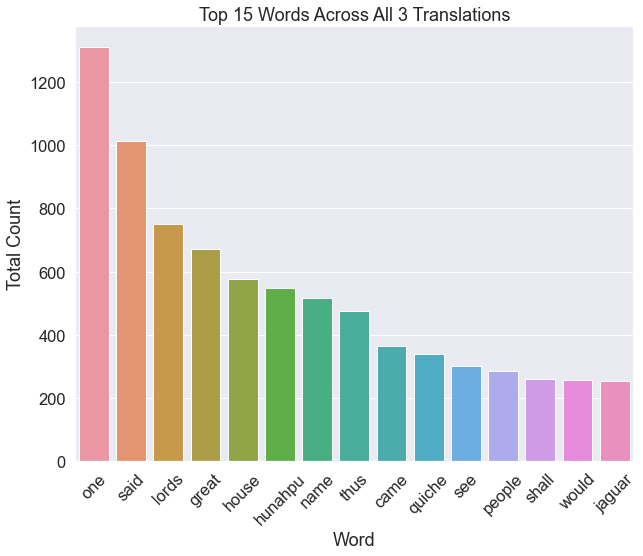

In [29]:
#grouped the datasets by words and took the sum of the frequencies to see the total count across all texts
grouped_df = new_df.groupby('word').sum().sort_values("frequency", ascending=False).head(15).reset_index()
grouped_df

#plot these words
sns.set(font_scale=1.5);
fig = plt.figure(figsize=(10, 8));
fig = sns.barplot(x="word", y='frequency', data= grouped_df);
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

plt.xlabel("Word");
plt.ylabel("Total Count");
plt.title("Top 15 Words Across All 3 Translations");

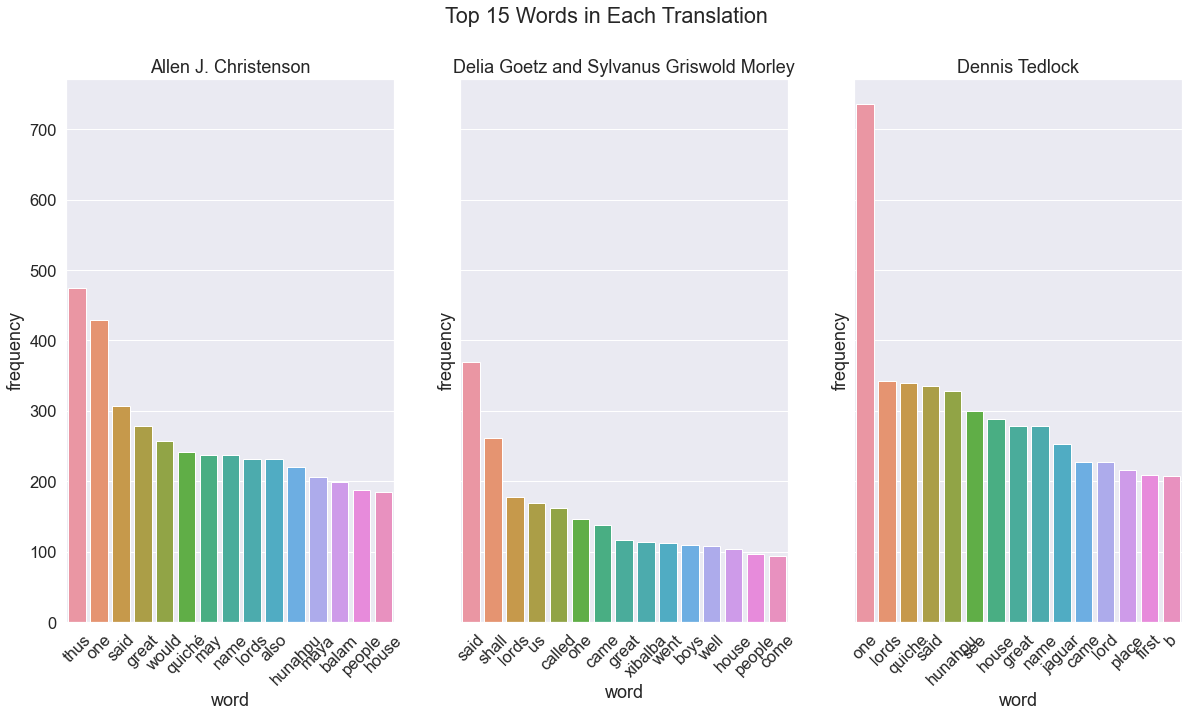

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10),sharey = True);
fig.suptitle('Top 15 Words in Each Translation');
names = ["Allen J. Christenson", "Delia Goetz and Sylvanus Griswold Morley", "Dennis Tedlock"]

# Allen J. Christenson
sns.barplot(ax=axes[0], x="word", y='frequency', data=a); 
axes[0].set_title(names[0]);
axes[0].set_xticklabels(labels = a['word'], rotation = 45);

# Delia Goetz and Sylvanus Griswold Morley
sns.barplot(ax=axes[1], x="word", y='frequency', data=b);
axes[1].set_title(names[1]);
axes[1].set_xticklabels(labels = b['word'], rotation = 45);

# Dennis Tedlock
sns.barplot(ax=axes[2], x="word", y='frequency', data=c);
axes[2].set_title(names[2]);
axes[2].set_xticklabels(labels = c['word'], rotation = 45);

Comparing the word frequencies across all the texts to the word frequencies in each individual text shows us how it's possible for a single text to skew the data. As we can see, Tedlock's translation uses "one" significantly more than the other texts, so much so that when we look at the top 15 words across all the texts combined, "one" is the leading word. However, it is valuable to note that "one" was second in Christenson's translations and sixth in Goetz's and Morley's top 15 words. The top words that stand out the most to me are "lords", "great", and "house." So far, the top words don't seem to be associated with violence or aggression, with the exception of "lords"; however, since this text deals largely with Quiché Maya religion, it makes sense to see it so frequently.

In order to get a more accurate representation of the words used across the translations, we will use the calculated statistic, **term frequency–inverse document frequency (TF-IDF Scores)**, and the CountVectorizer method.

## CountVectorizer & TF-IDF Scores

### CountVectorizer Method

We'll be looking for negative words across all the texts, particularly those associated with violence using this list https://gist.github.com/mkulakowski2/4289441, which was provided by:

Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
Proceedings of the ACM SIGKDD International Conference on Knowledge 
Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
Washington, USA,  

I will be drawing from this source to compile a list of words to reference. 

In [31]:
# opens the negative words text
negative_words = open("negative-words.txt", encoding = "utf-8").read()

#puts the negative words into a list
negative_words = negative_words.split()
print(negative_words[:5])

['war', 'abnormal', 'abolish', 'abominable', 'abominably']


In [32]:
#since some of the words in the negative word list are separated by hyphen, I'll use bigram vectorizor
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    token_pattern = r'\b\w+\b'
                                    )

# Corpus transformation
bigramv = bigram_vectorizer.fit_transform(texts_df['text']).toarray()

#Create this into a dataframe which lists translations as well
bigramv_df = pd.DataFrame(bigramv, columns = bigram_vectorizer.get_feature_names()).rename(index={0: names[0], 1:names[1], 2:names[2]})

In [33]:
#this finds all the negative words in the popol vuh, referencing the negative list of words from outside source
bivec_words = bigram_vectorizer.get_feature_names()
neg_words = []
for word in bivec_words:
    if word in negative_words:
        neg_words.append(word) 
print(neg_words[:5])

['abruptly', 'absence', 'abuse', 'abused', 'abuses']


Looking at the few words displayed, we can see that some negative words are more prevalent in one text compared to another. We also see that some words may be used as little as one time or zero times in some texts.

It's also important to compare the appearance of the word in its context. For example, the frequency of the words "sacrifice" and "kill" compared to the same words in relation to a person. These words may be used in non-violent contexts also, such as "making a sacrifice for someone else." In this example, it's interesting to note how all the translations have about the same frequency for "kill him". It is also interesting to note how "sacrifice" was used significantly more in Christenson's and Tedlock's translation and that "kill" was used comparably more in Goetz's and Morley's translation.

In [34]:
my_neg_words = ['sacrifice','sacrifice him', 'sacrifice her', 'human sacrifice','kill','kill him']
my_df = bigramv_df[my_neg_words]
my_df

,sacrifice,sacrifice him,sacrifice her,human sacrifice,kill,kill him
Allen J. Christenson,46,1,1,4,17,2
Delia Goetz and Sylvanus Griswold Morley,17,1,3,0,24,3
Dennis Tedlock,63,0,2,3,15,2


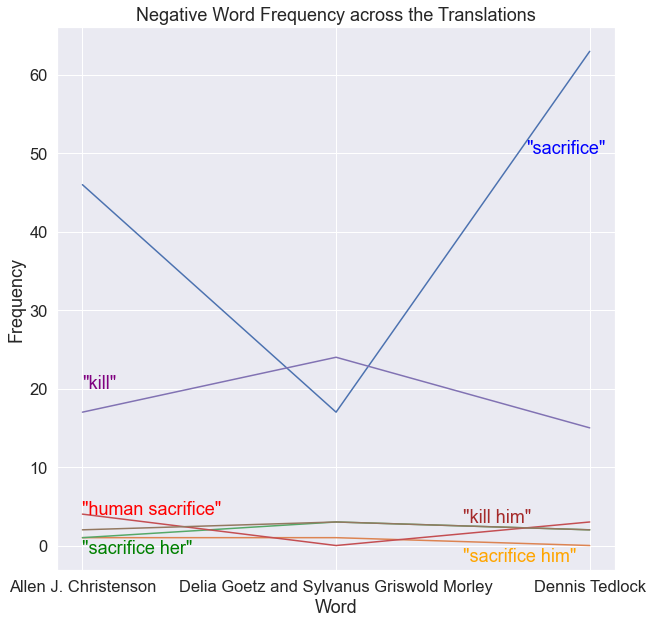

In [35]:
plt.figure(figsize=(10,10));
plt.plot(my_df);
plt.xlabel("Word");
plt.ylabel("Frequency");
plt.title("Negative Word Frequency across the Translations");
plt.text(1.75,50,'"sacrifice"', color = "blue");
plt.text(0,20,'"kill"', color = "purple");
plt.text(1.5,-2,'"sacrifice him"', color = "orange");
plt.text(0,-1,'"sacrifice her"', color = "green");
plt.text(0,4,'"human sacrifice"', color = "red");
plt.text(1.5,3,'"kill him"', color = "brown");

In [37]:
bigramv_df[my_neg_words]

,sacrifice,sacrifice him,sacrifice her,human sacrifice,kill,kill him
Allen J. Christenson,46,1,1,4,17,2
Delia Goetz and Sylvanus Griswold Morley,17,1,3,0,24,3
Dennis Tedlock,63,0,2,3,15,2


#### Let's look at the number of negative words compared to the total number of words per text

Also keep in mind that not every text has the negative word. One negative word might appear in only one text and not the rest, such as how the word "abuses" only appears in the 0th text (Christenson's translation). The total number of negative words across all translations is 837, but it may vary from text to text. Let's see how the translations differ.

We must also remember that Tedlock's and Christenson's translations both include commentary, so the frequency of words may be more due to their descriptions of the text.

In [38]:
len(neg_words) #837 negative words across all the texts

837

In [39]:
#sums the values by row.
sum1 = bigramv_df[my_neg_words].sum(axis=1)
sum1

Allen J. Christenson                        71
Delia Goetz and Sylvanus Griswold Morley    48
Dennis Tedlock                              85
dtype: int64

This shows the total count of negative phrases/words (from the list I created) in each individual text. We can see that Tedlock's translation has the highest count, followed by Christenson's translation. Now let's look at the longer list of negative words.

In [40]:
#sums the values by row.
sum2 = bigramv_df[neg_words].sum(axis = 1)
sum2

Allen J. Christenson                        1982
Delia Goetz and Sylvanus Griswold Morley     751
Dennis Tedlock                              1647
dtype: int64

In this case, Christenson's translation has more negative words, followed by Tedlock and lastly Goetz's and Morley's translation.

I want to look at the percent of negative words in each texts to see how much negative words make up the text. I will be using tokens as the count because it already excludes stop words, letting us focus on words with meaning. I will also focus on the longer list of negative words, not the list I constructed called my_neg_words. Although this does not include biagrams, we can see from the previous example that biagrams of negative words may likely appear far less frequently than the percentage we are calculating now.


In [41]:
# Allen J. Christenson text
p_allen = round(((sum2[0]/len(texts_df['tokens'][0])) * 100), 2) # text length: 48065

# Delia Goetz and Sylvanus Griswold Morley text
p_ds = round(((sum2[1]/len(texts_df['tokens'][1])) * 100), 2) # text length: 17063

# Dennis Tedlock text
p_dennis = round(((sum2[2]/len(texts_df['tokens'][2])) * 100), 2) # text length: 51535

print("Percentage of Negative Words in the Translations of the Popol Vuh:")
print(" ")
print("Allen J. Christenson's text: 4.12%") 
print(" ")
print("Delia Goetz's and Sylvanus Griswold Morley's text: 4.4%")
print(" ")
print("Dennis Tedlock's text: 3.2%")

Percentage of Negative Words in the Translations of the Popol Vuh:
 
Allen J. Christenson's text: 4.12%
 
Delia Goetz's and Sylvanus Griswold Morley's text: 4.4%
 
Dennis Tedlock's text: 3.2%


Although Christenson's and Tedlock's translation had more negative words based on frequency alone, when compared to their word count of their respective texts, both Christenson's and Tedlock's translations include less negative words compared to Goetz's and Morley's translation. It's also important to note that both Christenson and Tedlock also include commentary in their translation. This may make the negative words less frequent since in addition to *The Popol Vuh* there is more commentary. 

### TF-IDF Score Method

In [42]:
tfidfvec = TfidfVectorizer(stop_words ='english') #wont include stop words since I already cleaned my text
sparse_tfidf = tfidfvec.fit_transform(texts_df['text'])

#create a data frame using sparse_tfidf
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=texts_df.index)
tfidf

,aa,aab,aabal,aabil,aal,aalinic,aam,aamah,aamak,aamaxic,...,zuua,zuum,zuyua,zuyva,çaki,çipacnay,εalel,εan,εij,εuzεuh
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.001695,0.005933,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.001507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001947,0.001947,0.006814,0.00292,0.001947,0.000973,0.003894,0.000973,0.000973,0.00292,...,0.000973,0.001947,0.025910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The list of 15 words with highest TF-IDF weights across all the texts are in line with the values we got earlier using Counter() method. We now want to use this method to identify distinctive words for the individual translations compared to collection of our three texts as a whole. We will use these word scores to weigh the words not just by their frequency, but by their frequency in one document compared to their distribution across all documents.

In [43]:
# Look at the 15 words with highest tf-idf weights:
top_15_tfidf = tfidf.max().sort_values(ascending=False).head(15)
df_plt = pd.DataFrame(top_15_tfidf).reset_index().rename(columns = {'index':'word',0:'TF-IDF Score'})
df_plt.head()

,word,TF-IDF Score
0,said,0.432883
1,shall,0.305358
2,quiche,0.251698
3,hunahpu,0.242815
4,lords,0.207082


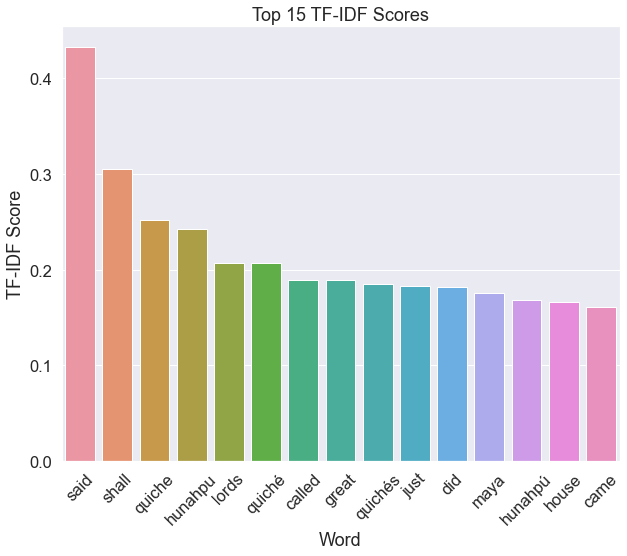

In [44]:
#plot these words
sns.set(font_scale=1.5);
fig = plt.figure(figsize=(10, 8));
fig = sns.barplot(x="word", y='TF-IDF Score', data= df_plt);
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

plt.xlabel("Word");
plt.ylabel("TF-IDF Score");
plt.title("Top 15 TF-IDF Scores");

In [45]:
#names is from a list we made earlier containing the translator's names
tfidf['translations'] = names
tfidf

,aa,aab,aabal,aabil,aal,aalinic,aam,aamah,aamak,aamaxic,...,zuum,zuyua,zuyva,çaki,çipacnay,εalel,εan,εij,εuzεuh,translations
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.001695,0.005933,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,Allen J. Christenson
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.001507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Delia Goetz and Sylvanus Griswold Morley
2,0.001947,0.001947,0.006814,0.00292,0.001947,0.000973,0.003894,0.000973,0.000973,0.00292,...,0.001947,0.025910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dennis Tedlock


In [46]:
# we will be looking at the tfidf scores for each individual translation
allen = tfidf[tfidf['translations'] == "Allen J. Christenson"]
ds = tfidf[tfidf['translations'] == "Delia Goetz and Sylvanus Griswold Morley"]
dennis = tfidf[tfidf['translations'] == "Dennis Tedlock"]

In [47]:
# "Allen J. Christenson"
allen.max(numeric_only=True).sort_values(ascending=False).head(15)

quiché     0.206802
said       0.203383
hunahpu    0.191546
great      0.188902
quichés    0.184994
maya       0.175442
lords      0.163233
balam      0.132956
people     0.130323
house      0.130323
maize      0.124589
shall      0.120450
lord       0.117159
nations    0.115266
word       0.109919
dtype: float64

**maize**:  Corn

In [48]:
# Delia Goetz and Sylvanus Griswold Morley
ds.max(numeric_only=True).sort_values(ascending=False).head(15)

said           0.432883
shall          0.305358
lords          0.207082
called         0.189533
did            0.182513
hunahpú        0.168377
came           0.161454
xbalanqué      0.150549
great          0.135715
xibalba        0.133375
went           0.132205
balamquitzé    0.128759
boys           0.128695
house          0.121675
balamacab      0.118854
dtype: float64

**Xbalanqué**: "The Hero Twins are famous Mayan semi-gods called Hunahpu and **Xbalanque**, whose story is narrated in the Popol Vuh (“The Book of Council”)." https://www.thoughtco.com/hunahpu-xbalanque-maya-hero-twins-171590

**Balamquitzé & Balamacab**: Is another version of "Balam-Quitzé"(Jaguar Quitze) and Balam-Acab (Jaguar Night), two of the four men who were created from corn by the gods.(https://www.thoughtco.com/the-popol-vuh-the-maya-bible-2136319)

In [49]:
# Dennis Tedlock
dennis.max(numeric_only=True).sort_values(ascending=False).head(15)

quiche       0.251698
hunahpu      0.242815
lords        0.196616
said         0.193166
just         0.182818
house        0.166146
great        0.159822
jaguar       0.145450
andres       0.144062
pv           0.143088
came         0.131077
lord         0.130502
xbalanque    0.126589
place        0.124178
day          0.116705
dtype: float64

Through these scores, we see that "said" and "shall" most distinguish Goetz's and Morley's translations from the other two. We also see that Christenson's and Tedlock's translations have fairly close scores for the word "Quiché." 

It is interesting to note that we still don't see violent or aggressive words as the most frequently used words in these translations.

## Topic Modeling

To make the best use of the CountVectorizer and TF-IDF Scores, we should apply them in Topic Modeling. I will be focusing on the CountVectorizer approach and will be using **LDA**, Latent Dirichlet Allocation, a particular model for topic modeling--LDA works well since it does not take document order into account. This is an unsupervised model that groups our words into separate categories. It looks to see which words may go together as a topic within our collection of texts.

We do this by first defining a "bag of words" model using CountVectorizer, which classifies a text by turning it into a "bag" of words to normalize and count them. We then transform it into a document term matrix, which displays term frequencies that occur across our collection of documents. We want to encode the documents into a sparse matrix to represent the frequencies of each vocabulary word across the documents. (http://localhost:8888/notebooks/DIGHUM101-2021/Notebooks/Week5/5-1_topic-modeling.ipynb)

The input into our LDA is this sparse matrix which we have created using CountVectorizer.

In [50]:
#since some of the words in the negative word list are separated by hyphen, I'll use bigram vectorizor
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b'
                                    )
# Corpus transformation
bigramv = bigram_vectorizer.fit_transform(texts_df['text'])

#Get an idea of how the input looks and what the input is for the lda
print(type(bigramv))
print(bigramv.shape)
#print(bigramv)

<class 'scipy.sparse.csr.csr_matrix'>
(3, 89867)


In [51]:
#predetermine number of topics
n_topics = 5

# Instantiate our LDA model 
lda = LatentDirichletAllocation(n_components = n_topics, 
                                max_iter = 20, #under the hood LDA is using complex nueral network that incorporates this process of iterally learning the model and weights
                                random_state = 42 #so that we all get the same results
                               )
#pass sparse matrix with bigramv scores into the LDA model
lda = lda.fit(bigramv) 

In [52]:
# function to print out the top words for each topic thats been identified by the algorithm:

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx+1))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [53]:
# Returns the topics
bv_feature_names = bigram_vectorizer.get_feature_names() # the name of each word in the vocabulary
print_top_words(lda, bv_feature_names, 20)


Topic #1:
said, shall, lords, called, did, came, great, xibalba, went, boys, house, people, come, let, tribes, hunahpú, men, tohil, xbalanqué, earth

Topic #2:
lords, quiche, said, hunahpu, just, house, great, jaguar, came, lord, place, b, day, seven, people, like, xbalanque, xibalba, tohil, andres

Topic #3:
thanks tohil, ball comes, names went, hung arm, bottoms, great fasts, ball grandmother, drowned, lost deceived, spoke like, vigor, shake, violated, shaking, generation don, generation iztayul, meet, generation tepepul, hail fell, spoke came

Topic #4:
thanks tohil, ball comes, names went, hung arm, bottoms, great fasts, ball grandmother, drowned, lost deceived, spoke like, vigor, shake, violated, shaking, generation don, generation iztayul, meet, generation tepepul, hail fell, spoke came

Topic #5:
said, great, lords, quiché, hunahpu, maya, balam, people, house, shall, lord, word, quichés, came, did, maize, earth, death, called, used


Above, topics 3 and 4 appear to have the exact same words. Taking that into consideration, I would say that those are the topics with the words that have the most violent/aggresive conotations in my opinion. One word that stands out in those topics is "ball" which may be refering to the ancient Maya ball game which intertwines religous beliefs with cultural customs:"Some ball games were played to resolve bitter disputes between rival cities or as a proxy for war. The Maya also saw the game as a battle between the gods of death and the gods of life or between good and evil. They also saw it as a reminder of the Hero Twins, who overcame death and became demi-gods themselves. Thus, the game symbolizes regeneration and life." More description on this game can be found here:https://www.historyonthenet.com/the-mayan-ball-game. 
The other word that stands out is "death" in topic 5, but the other words included don't seem as negative in comparison. Generally, across these topics we see words that are consistent with the overall storyline of the text: the story of creation through a narrative that follows two "Hero Twins" and their victory over the lords of Xibalba (the underworld)." (https://www.historians.org/teaching-and-learning/teaching-resources-for-historians/teaching-and-learning-in-the-digital-age/creation-stories-and-epics/popol-vuh#:~:text=The%20Popol%20Vuh%20is%20the,account%20of%20this%20dramatic%20conflict.)

In [54]:
panel = pyLDAvis.sklearn.prepare(lda_model = lda, 
                                 dtm = bigramv, 
                                 vectorizer = bigram_vectorizer, 
                                 mds = "tsne" #different algorithms
                                )
pyLDAvis.display(panel)

**Interpreting the Visualization**

This visualization answers the question (1) What is the meaning of each topic?, (2) How prevalent is each topic?, and (3) How do the topics
relate to each other? The creators of this visualization, Carson Sievert and Kenneth E. Shirley, give a great description on how to interpret the results:
"Our visualization has
two basic pieces. First, the left panel of our visualization presents a global view of the topic model,
and answers questions 2 and 3. In this view, we
plot the topics as circles in the two-dimensional
plane whose centers are determined by computing the distance between topics, and then by using multidimensional scaling to project the intertopic distances onto two dimensions, as is done
in (Chuang et al., 2012a). We encode each topic’s
overall prevalence using the areas of the circles,
where we sort the topics in decreasing order of
prevalence."


"Second, the right panel of our visualization depicts a horizontal barchart whose bars represent
the individual terms that are the most useful for interpreting the currently selected topic on the left,
and allows users to answer question 1, “What is
the meaning of each topic?”. A pair of overlaid
bars represent both the corpus-wide frequency of
a given term as well as the topic-specific frequency."
(https://www.aclweb.org/anthology/W14-3110.pdf)

From this description, we can interpret that the topic 1 and 2 are most related to each other and are also the most prevelant topics in the text, compared to the third topic. We can see that the topic 3 is most unlike the other 2 topics since it's located further away from them on the graph. It is also not as prevelant amongst the translations, based on it's smaller circular area in the visualtion. 

**Saliency** is designed to look at words on a corpus-scale, as opposed to an individual topic levels. **Relevance** is a metric used for ranking terms within topics. It helps identify the most relevant words within a given topic. (https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992#:~:text=Saliency%20is%20designed%20to%20look,words%20within%20a%20given%20topic.)

**Defining the Terms**:

**Andrés Xiloj/Andrés/Xiloj**: was a Quiché daykeeper from Momostenango in Guatemala who helped Dennis Tedlock in elaborating his translation of the Popol Vuh.

*for the descriptions of the other Quiché Maya terms, refer to earlier sections in the notebook which cover these words*

From this description of Andrés Xiloj alone, we can see that the commentary included in the translated texts heavily influenced the meaning and prevalence of the topics found through LDA. On one hand, this is good because the commentary gives more insight into what is being explained in *The Popol Vuh*, such as the perspective from Xiloj given in Tedlock's translation. However, it also skews our resulting topics and top words used, as seen above. This limits our interpretation of the topics present in the text.

## Concluding Thoughts

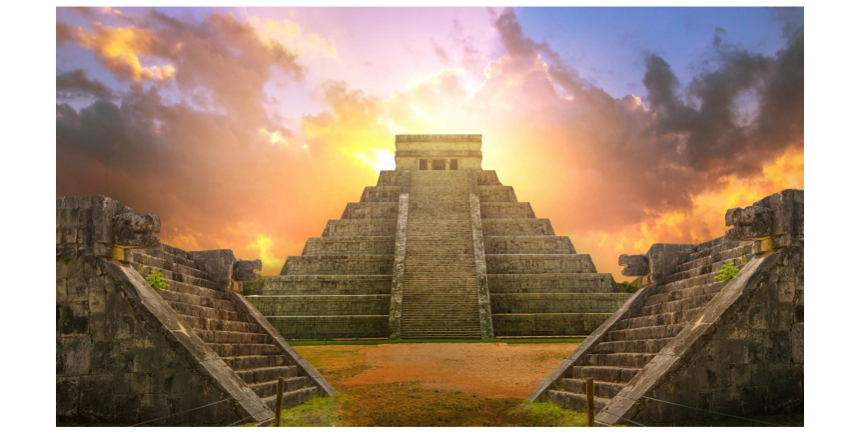

In [55]:
from IPython.core.display import Image, display
movies_path = "/Users/emilylopez/Desktop/DIGHUM101/DIGHUM101_Indiv_Proj/pdftotext/conclusion.jpeg"
display(Image(movies_path, width=800, unconfined=True))

Overall, I did not see as much violent topics and vocabulary as I had expected to see. In my opinion, this shows that this influential Maya text is distinct from how ancient Maya culture is percieved in the media and historical research. From my understanding, this text is more reflective of the Maya's values and beliefs on creation. I believe modern media in particular should focus on portraying this narrative of Maya culture, especially considering how this text continues to play and important role in modern Maya communities. 

What I found interesting was the slight variation amongst the texts when it came to word usage. We have to take into consideration, however, that two of the longer texts included commentary from the authors. This may have also skewed our overall results. 

If I were to continue this project, I would work to remove the commentary from the texts and would try to conduct the research again with more translations. It would also be interesting to investigate further on which translation is the most published and if its vocabulary and themes more consistant with how we see the ancient Maya portrayed in the media and research. 

Through this experience, I can also say that the application of computational text analysis tools in the digital humanities seems promising. I would like to further explore this concentration to tackle research questions like the one I addressed in this notebook.

***note** *Parts of this code were directly influenced by the resources and notebooks available to us in the Digital Humanities 101 course* 